In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from skimage.data import imread
from skimage import io
import matplotlib.pyplot as plt

In [3]:
PATH="data/airbus_ship/"

Load the data:

In [4]:
masks_df = pd.read_csv(f"{PATH}train_ship_segmentations_v2.csv")
masks_df.describe()

,ImageId,EncodedPixels
count,231723,81723
unique,192556,81722
top,626beb313.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...
freq,15,2


Two pictures seem to be the same:

In [5]:
masks_df_nona = masks_df.dropna()

masks_df_nona[masks_df_nona.duplicated("EncodedPixels", False)]

,ImageId,EncodedPixels
52192,3a082cd94.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...
158723,af41002a2.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...


In [6]:
masks_df_nona.describe()

,ImageId,EncodedPixels
count,81723,81723
unique,42556,81722
top,2053a78bd.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...
freq,15,2


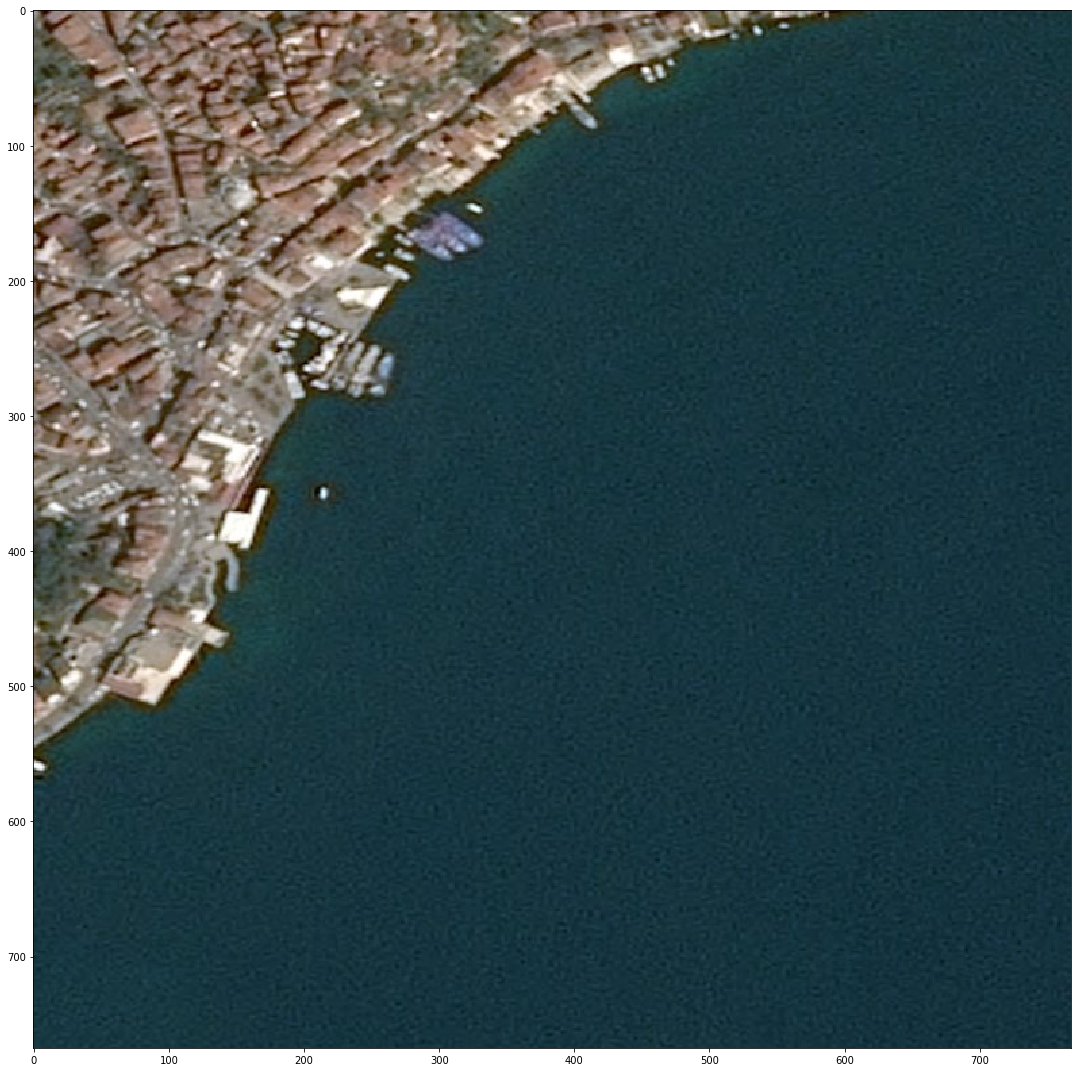

In [7]:
img = io.imread(f"{PATH}train/16ccec57a.jpg")
plt.figure(figsize=(15, 15))
io.imshow(img)
plt.show()

img = io.imread(f"{PATH}train/6384c3e78.jpg")
plt.figure(figsize=(15, 15))
io.imshow(img)
plt.show()
OSError: image file is truncated (55 bytes not processed)

In [8]:
#!rm "{PATH}train/6384c3e78.jpg"

Seems like some photos are empty:

/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


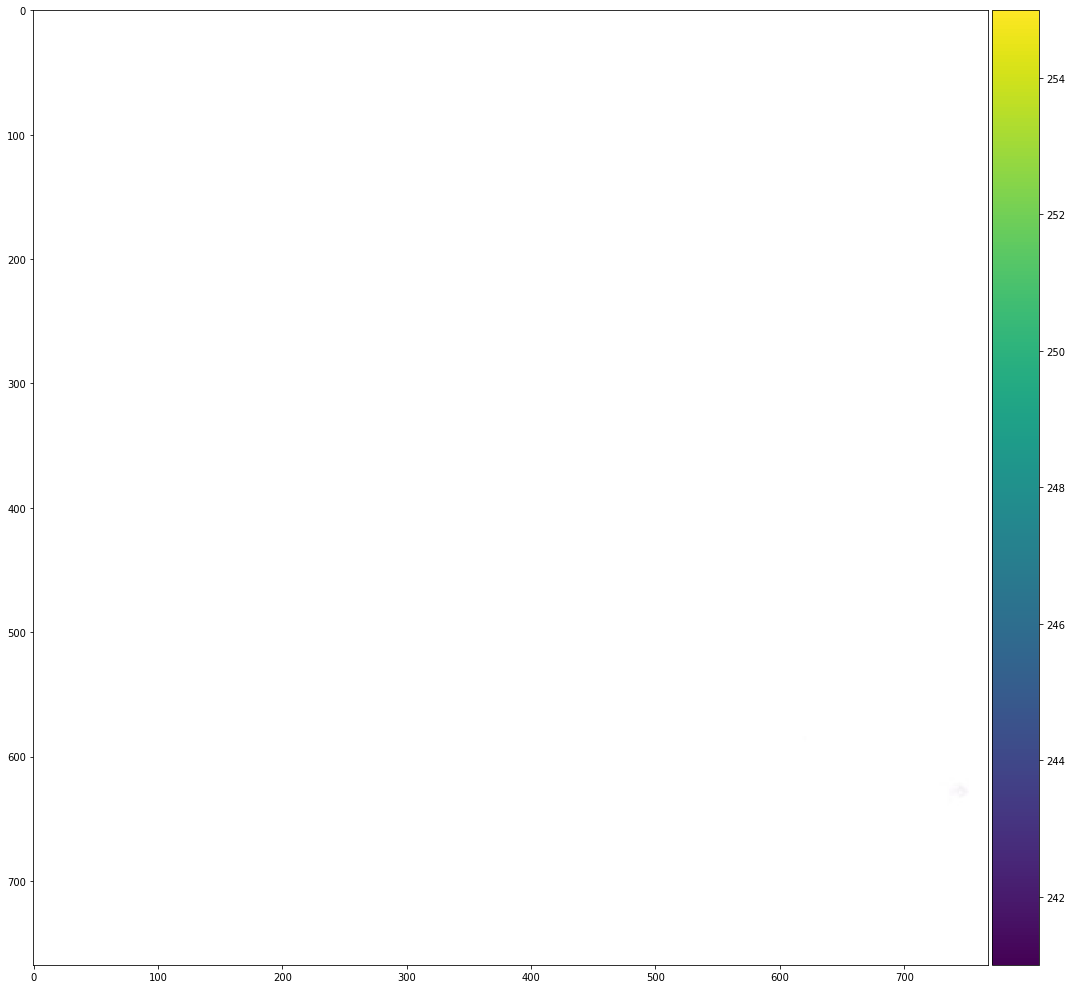

In [9]:
img = io.imread(f"{PATH}train/0ef6cd331.jpg")
plt.figure(figsize=(15, 15))
io.imshow(img)
plt.show()
plt.clf()
plt.cla()
plt.close()

Need to check pictures with small size for contents:

In [10]:
!find ./data/airbus_ship/train -size -60k -exec ls -lh {} \+ | head

-rw-rw-r-- 1 mtolstokory mtolstokory  47K Oct  1 16:43 ./data/airbus_ship/train/0005d01c8.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  23K Oct  1 16:22 ./data/airbus_ship/train/001bfb70a.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  54K Oct  1 16:44 ./data/airbus_ship/train/002e8a977.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  45K Oct  1 16:46 ./data/airbus_ship/train/0069e6715.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  46K Oct  1 16:28 ./data/airbus_ship/train/006abf2b8.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  15K Oct  1 16:26 ./data/airbus_ship/train/0080bd6a5.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  52K Oct  1 16:43 ./data/airbus_ship/train/0098456ff.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  58K Oct  1 16:22 ./data/airbus_ship/train/00ae308a0.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  44K Oct  1 16:43 ./data/airbus_ship/train/00c81c432.jpg
-rw-rw-r-- 1 mtolstokory mtolstokory  49K Oct  1 16:45 ./data/airbus_ship/train/00dc0b515.jpg
ls: write error: Broken pipe


Check proportion of images with ships:

In [11]:
masks_df[masks_df["EncodedPixels"].isnull()].describe()

,ImageId,EncodedPixels
count,150000,0.0
unique,150000,0.0
top,3df0ef114.jpg,NaN
freq,1,NaN


In [12]:
print("% of images with ships: {:.2f}%".format(42556/192556*100))

% of images with ships: 22.10%


In [13]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

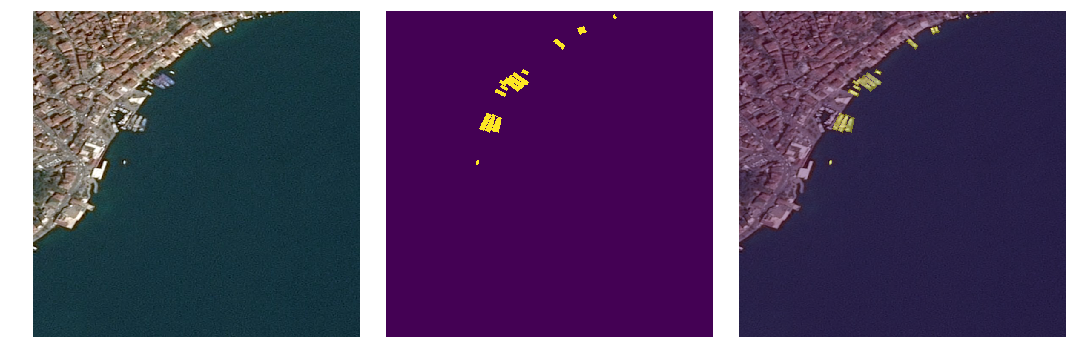

In [14]:
ImageId = '16ccec57a.jpg'

img = imread(f'{PATH}train/' + ImageId)
img_masks = masks_df.loc[masks_df['ImageId'] == ImageId, 'EncodedPixels'].tolist()
# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768), dtype = "uint8")
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()